### Weather Data API Sample

* Key feature is to ease data accessibility, using only location, time range, and parameter. Data is returned in JSON format.
* Accessing parameters to generate one AMY takes about 5 seconds per year on the sever side. Longer time period is ok, but will take longer.
* There are more data available (about ~30 surface parameters total) but showing a smaller subset for review

In [18]:
import seaborn as sns
sns.set(style="darkgrid")
import json
import requests
import pandas as pd

params= {'param': ['temperature', 'dewpoint_temperature', 'wind_speed', 'total_precipitation'],
          'start': '1980-01-01',                
          'end': '2019-12-31',
          'location': 'Dakar, Senegal',
          'freq': 'D',
          'api-key': 'INSERT-YOUR-API-KEY'
        }

r = requests.get('https://api.oikolab.com/weather', params=params)

weather_data = json.loads(r.json()['data'])
df = pd.DataFrame(index = pd.to_datetime(weather_data['index'],unit = 's'),
                  data = weather_data['data'],
                  columns = weather_data['columns'])
df.index.name = 'datetime'

print('Processing time: %s'% attributes['processing_time'])

Processing time: 5.209


In [19]:
df.head()

,temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),total_precipitation (mm of water equivalent)
datetime,,,,
1980-01-01,23.97,14.16,6.53,0.0
1980-01-02,23.21,16.52,5.43,0.0
1980-01-03,23.19,18.07,4.83,0.0
1980-01-04,22.81,18.82,5.46,0.0
1980-01-05,22.69,18.55,5.53,0.0


<AxesSubplot:xlabel='datetime'>

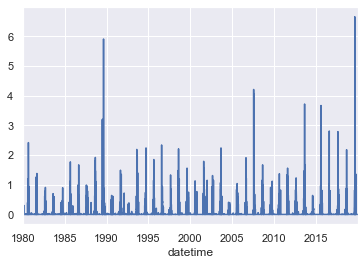

In [24]:
df['total_precipitation (mm of water equivalent)'].plot()

<AxesSubplot:>

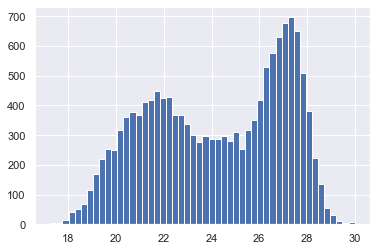

In [20]:
df['temperature (degC)'].hist(bins=50)

<AxesSubplot:xlabel='datetime'>

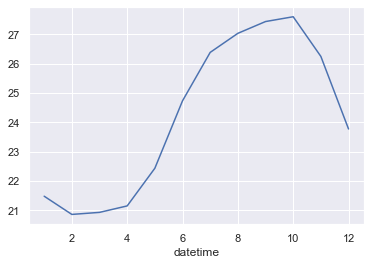

In [22]:
df.groupby(df.index.month).mean()['temperature (degC)'].plot()

<AxesSubplot:xlabel='datetime'>

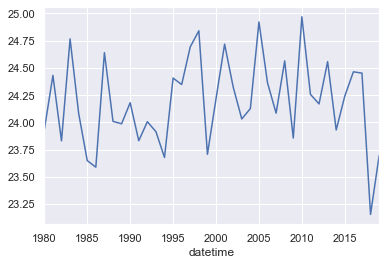

In [23]:
df.resample('Y').mean()['temperature (degC)'].plot()